In [28]:
import numpy as np
import pandas as pd

In [29]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day44-outlier-detection-using-percentiles/weight-height.csv'
df = pd.read_csv(url)

In [30]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [32]:
df.shape

(10000, 3)

In [33]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [34]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

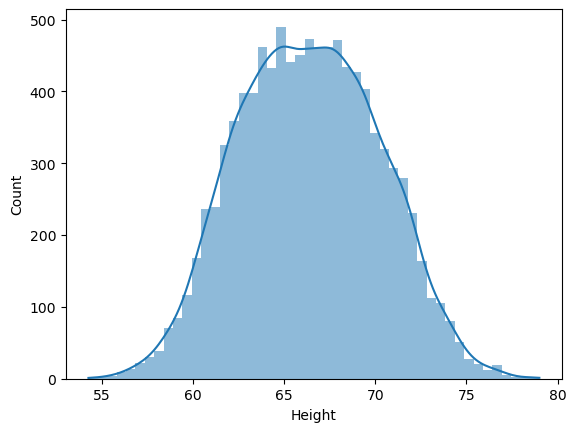

In [35]:
sns.histplot(df['Height'],kde = True, linewidth = 0)

<Axes: ylabel='Height'>

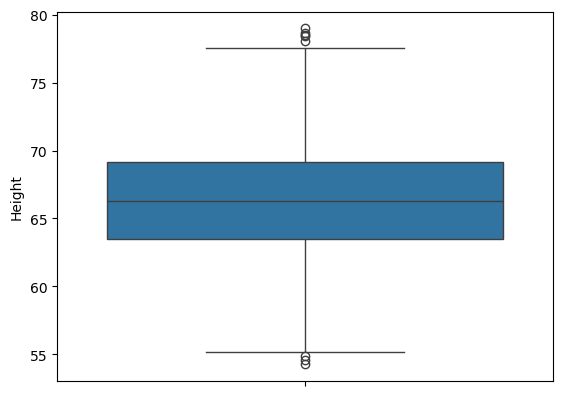

In [36]:
sns.boxplot(df['Height'])

In [37]:
upper = df['Height'].quantile(0.99)
upper

np.float64(74.7857900583366)

In [38]:
lower = df['Height'].quantile(0.01)
lower

np.float64(58.13441158671655)

In [43]:
new_df = df[(df['Height'] <=74.78) & (df['Height'] >= 58.13)]

In [45]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [46]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

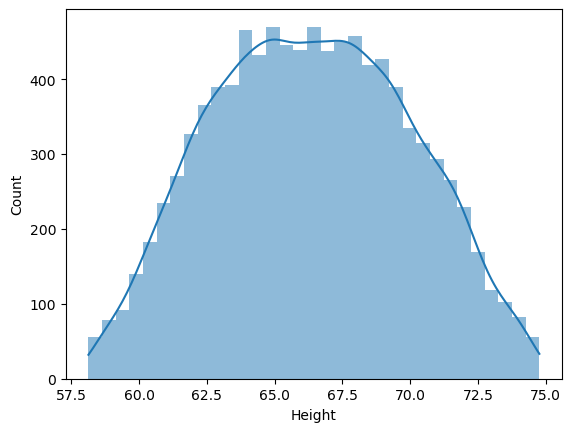

In [47]:
sns.histplot(new_df['Height'],kde = True, linewidth = 0)

<Axes: xlabel='Height'>

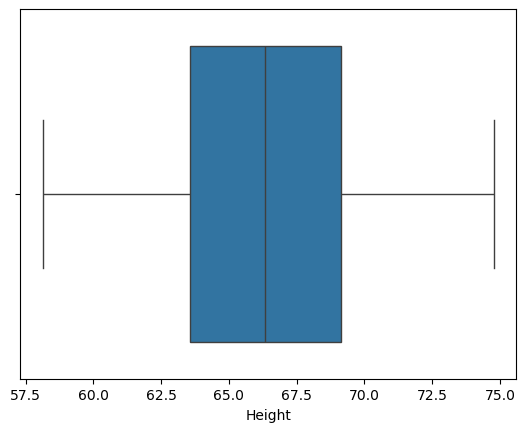

In [50]:
sns.boxplot(new_df['Height'],orient = 'h')

In [54]:
#capping --> winserization
df['Height'] = np.where(df['Height']>= upper,
        upper,
        np.where(df['Height'] <= lower,
                 lower,
                 df['Height']))

In [57]:
df.shape

(10000, 3)

In [58]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64